### 실전 데이터 셋 분석

### 01. 유동인구 데이터 셋 분석

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(readxl)

In [7]:
doc <- read_excel("D:\\dataset\\11_innovation\\moving_dataset_skt\\table_define.xlsx", col_names = T)
doc

sheet_name,sheet_num,content,상세,filename
sheet_info,1,시트 정보,엑셀 파일 설명,None
all_table,2,테이블 정보,전체 테이블 정보,데이터 셋에 대한 전체 정보
01_basic_info,3,기초정보,행정동코드 정보,종로_노원_행정동.DBF~종로_노원_행정동.SHX
01_moving_pop,4,유동인구_연령,5세단위 노원구/종로구 유동인구,노원_종로_FLOW_AGE_201804.CSV~ 노원_종로_FLOW_AGE_201903.CSV
01_moving_pop_hour,5,유동인구_시간,1시간단위 노원구/종로구 유동인구,노원_종로_FLOW_TIME_201804.CSV ~ 노원_종로_FLOW_TIME_201903.CSV


In [58]:
doc4 <- read_excel("D:\\dataset\\11_innovation\\moving_dataset_skt\\table_define.xlsx", col_names = T, sheet=4)
doc4

No.,컬럼ID,컬럼명,타입,길이
1,STD_YM,년월,VARCHAR2,6
2,STD_YMD,년월일,VARCHAR2,8
3,HDONG_CD,행정동코드,VARCHAR2,10
4,HDONG_NM,행정동명칭,VARCHAR2,50
5,MAN_FLOW_POP_CNT_0004,남성_0004세 유동인구,NUMBER,"(18, 2)"
6,MAN_FLOW_POP_CNT_0509,남성_0509세 유동인구,NUMBER,"(18, 2)"
7,MAN_FLOW_POP_CNT_1014,남성_1014세 유동인구,NUMBER,"(18, 2)"
8,MAN_FLOW_POP_CNT_1519,남성_1519세 유동인구,NUMBER,"(18, 2)"
9,MAN_FLOW_POP_CNT_2024,남성_2024세 유동인구,NUMBER,"(18, 2)"
10,MAN_FLOW_POP_CNT_2529,남성_2529세 유동인구,NUMBER,"(18, 2)"


### 폴더안 파일 목록 확인

In [10]:
#  연령별 유동인구
list.files(path="D:\\dataset\\11_innovation\\moving_dataset_skt\\year_moving", pattern = NULL)

#  시간별 유동인구
list.files(path="D:\\dataset\\11_innovation\\moving_dataset_skt\\hour_moving", pattern = NULL)

[1] "노원_종로_FLOW_AGE_201804.CSV" "노원_종로_FLOW_AGE_201805.CSV"
 [3] "노원_종로_FLOW_AGE_201806.CSV" "노원_종로_FLOW_AGE_201807.CSV"
 [5] "노원_종로_FLOW_AGE_201808.CSV" "노원_종로_FLOW_AGE_201809.CSV"
 [7] "노원_종로_FLOW_AGE_201810.CSV" "노원_종로_FLOW_AGE_201811.CSV"
 [9] "노원_종로_FLOW_AGE_201812.CSV" "노원_종로_FLOW_AGE_201901.CSV"
[11] "노원_종로_FLOW_AGE_201902.CSV" "노원_종로_FLOW_AGE_201903.CSV"

[1] "노원_종로_FLOW_TIME_201804.CSV" "노원_종로_FLOW_TIME_201805.CSV"
 [3] "노원_종로_FLOW_TIME_201806.CSV" "노원_종로_FLOW_TIME_201807.CSV"
 [5] "노원_종로_FLOW_TIME_201808.CSV" "노원_종로_FLOW_TIME_201809.CSV"
 [7] "노원_종로_FLOW_TIME_201810.CSV" "노원_종로_FLOW_TIME_201811.CSV"
 [9] "노원_종로_FLOW_TIME_201812.CSV" "노원_종로_FLOW_TIME_201901.CSV"
[11] "노원_종로_FLOW_TIME_201902.CSV" "노원_종로_FLOW_TIME_201903.CSV"

In [11]:
setwd("D:\\dataset\\11_innovation\\moving_dataset_skt")
getwd()

[1] "D:/dataset/11_innovation/moving_dataset_skt"

In [19]:
year_dat1 <- read.table("./year_moving/노원_종로_FLOW_AGE_201804.CSV", sep="|")
year_dat1

ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : 라인 2는 34개의 구성요소들을 가지고 있지 않습니다


In [18]:
year_dat1 <- read.table("./year_moving/test.CSV", sep="|")
year_dat1

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
201804,20180401,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.3,...,1437.8,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56
201804,20180401,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,6892.47,5743.1,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08
201804,20180401,1111054000,삼청동,0,78.07,255.24,331.09,654.32,1264.86,...,1400.28,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.6,359.03,421.64
201804,20180401,1111055000,부암동,0,228.5,753.31,981.54,1615.77,2732,...,2153.73,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65
201804,20180401,1111056000,평창동,0,354.38,1500.63,1963.08,2593.07,4927.24,...,3775.91,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41
201804,20180401,1111057000,무악동,0.18,39.69,204.43,377.5,509.92,766.21,...,726.12,698.17,769.8,777.93,885,790.96,796.02,663.07,335.06,505
201804,20180401,1111058000,교남동,0.1,71.96,296.03,424.87,644.91,1135.05,...,1275.23,1195.05,1293.85,1149.73,1336.16,1236.98,1233.81,1005.98,511.36,659.94


In [21]:
year_dat1 <- read.table("./year_moving/test_flow_age_201804.csv", sep="|")
head(year_dat1)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
201804,20180401,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.3,...,1437.8,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56
201804,20180401,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,6892.47,5743.1,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08
201804,20180401,1111054000,삼청동,0,78.07,255.24,331.09,654.32,1264.86,...,1400.28,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.6,359.03,421.64
201804,20180401,1111055000,부암동,0,228.5,753.31,981.54,1615.77,2732,...,2153.73,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65
201804,20180401,1111056000,평창동,0,354.38,1500.63,1963.08,2593.07,4927.24,...,3775.91,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41


In [41]:
year_dat_1804 <- read.table("./year_moving/test_flow_age_201804.csv", sep="|", header=TRUE)
year_dat_1805 <- read.table("./year_moving/test_flow_age_201805.csv", sep="|", header=TRUE)
year_dat_1806 <- read.table("./year_moving/test_flow_age_201806.csv", sep="|", header=TRUE)
year_dat_1807 <- read.table("./year_moving/test_flow_age_201807.csv", sep="|", header=TRUE)
year_dat_1808 <- read.table("./year_moving/test_flow_age_201808.csv", sep="|", header=TRUE)
year_dat_1809 <- read.table("./year_moving/test_flow_age_201809.csv", sep="|", header=TRUE)
year_dat_1810 <- read.table("./year_moving/test_flow_age_201810.csv", sep="|", header=TRUE)
year_dat_1811 <- read.table("./year_moving/test_flow_age_201811.csv", sep="|", header=TRUE)
year_dat_1812 <- read.table("./year_moving/test_flow_age_201812.csv", sep="|", header=TRUE)
year_dat_1901 <- read.table("./year_moving/test_flow_age_201901.csv", sep="|", header=TRUE)
year_dat_1902 <- read.table("./year_moving/test_flow_age_201902.csv", sep="|", header=TRUE)
year_dat_1903 <- read.table("./year_moving/test_flow_age_201903.csv", sep="|", header=TRUE)

In [42]:
dim(year_dat_1804)
head(year_dat_1804)

[1] 1080   34

STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
201804,20180401,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.30,...,1437.80,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56
201804,20180401,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,6892.47,5743.10,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08
201804,20180401,1111054000,삼청동,0.00,78.07,255.24,331.09,654.32,1264.86,...,1400.28,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.60,359.03,421.64
201804,20180401,1111055000,부암동,0.00,228.50,753.31,981.54,1615.77,2732.00,...,2153.73,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65
201804,20180401,1111056000,평창동,0.00,354.38,1500.63,1963.08,2593.07,4927.24,...,3775.91,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41
201804,20180401,1111057000,무악동,0.18,39.69,204.43,377.50,509.92,766.21,...,726.12,698.17,769.80,777.93,885.00,790.96,796.02,663.07,335.06,505.00


In [43]:
nrow(year_dat_1804); 
nrow(year_dat_1805); 
nrow(year_dat_1806); 
nrow(year_dat_1807); 
nrow(year_dat_1808); 
nrow(year_dat_1809); 
nrow(year_dat_1810); 
nrow(year_dat_1811); 
nrow(year_dat_1812); 

[1] 1080

[1] 1116

[1] 1080

[1] 1116

[1] 1116

[1] 1080

[1] 1116

[1] 1080

[1] 1116

### 행 연결

In [44]:
df_1 <- data.frame(x = 1:3, y = 1:3)
df_2 <- data.frame(x = 4:6, y = 4:6)
rbind(df_1, df_2)

x,y
1,1
2,2
3,3
4,4
5,5
6,6


In [45]:
bind_rows(df_1, df_2)

x,y
1,1
2,2
3,3
4,4
5,5
6,6


In [46]:
all_year_dat <- bind_rows(year_dat_1804, year_dat_1805, year_dat_1806, 
                          year_dat_1807, year_dat_1808, year_dat_1809, 
                          year_dat_1810, year_dat_1811, year_dat_1812,
                          year_dat_1901, year_dat_1902, year_dat_1903)
head(all_year_dat); 

STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
201804,20180401,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.30,...,1437.80,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56
201804,20180401,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,6892.47,5743.10,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08
201804,20180401,1111054000,삼청동,0.00,78.07,255.24,331.09,654.32,1264.86,...,1400.28,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.60,359.03,421.64
201804,20180401,1111055000,부암동,0.00,228.50,753.31,981.54,1615.77,2732.00,...,2153.73,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65
201804,20180401,1111056000,평창동,0.00,354.38,1500.63,1963.08,2593.07,4927.24,...,3775.91,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41
201804,20180401,1111057000,무악동,0.18,39.69,204.43,377.50,509.92,766.21,...,726.12,698.17,769.80,777.93,885.00,790.96,796.02,663.07,335.06,505.00


In [47]:
str(all_year_dat)
dim(all_year_dat)
summary(all_year_dat)

'data.frame':	13140 obs. of  34 variables:
 $ STD_YM                : int  201804 201804 201804 201804 201804 201804 201804 201804 201804 201804 ...
 $ STD_YMD               : int  20180401 20180401 20180401 20180401 20180401 20180401 20180401 20180401 20180401 20180401 ...
 $ HDONG_CD              : int  1111051500 1111053000 1111054000 1111055000 1111056000 1111057000 1111058000 1111060000 1111061500 1111063000 ...
 $ HDONG_NM              : Factor w/ 36 levels "가회동","공릉1동",..: 32 7 8 6 33 5 4 1 23 24 ...
 $ MAN_FLOW_POP_CNT_0004 : num  0.05 1.25 0 0 0 0.18 0.1 0 0 0 ...
 $ MAN_FLOW_POP_CNT_0509 : num  78.9 262.5 78.1 228.5 354.4 ...
 $ MAN_FLOW_POP_CNT_1014 : num  403 1207 255 753 1501 ...
 $ MAN_FLOW_POP_CNT_1519 : num  643 2178 331 982 1963 ...
 $ MAN_FLOW_POP_CNT_2024 : num  984 4077 654 1616 2593 ...
 $ MAN_FLOW_POP_CNT_2529 : num  1792 6888 1265 2732 4927 ...
 $ MAN_FLOW_POP_CNT_3034 : num  1936 6787 1375 3391 5718 ...
 $ MAN_FLOW_POP_CNT_3539 : num  2061 6874 1445 4288 6998 ..

[1] 13140    34

     STD_YM          STD_YMD            HDONG_CD            HDONG_NM    
 Min.   :201804   Min.   :20180401   Min.   :1.111e+09   가회동 :  365  
 1st Qu.:201807   1st Qu.:20180701   1st Qu.:1.111e+09   공릉1동:  365  
 Median :201809   Median :20180930   Median :1.135e+09   공릉2동:  365  
 Mean   :201831   Mean   :20183134   Mean   :1.124e+09   교남동 :  365  
 3rd Qu.:201812   3rd Qu.:20181230   3rd Qu.:1.135e+09   무악동 :  365  
 Max.   :201903   Max.   :20190331   Max.   :1.135e+09   부암동 :  365  
                                                         (Other):10950  
 MAN_FLOW_POP_CNT_0004 MAN_FLOW_POP_CNT_0509 MAN_FLOW_POP_CNT_1014
 Min.   : 0.0000       Min.   :   1.02       Min.   :  21.15      
 1st Qu.: 0.0000       1st Qu.:  55.22       1st Qu.: 293.33      
 Median : 0.0000       Median :  94.39       Median : 500.87      
 Mean   : 0.6524       Mean   : 131.66       Mean   : 650.56      
 3rd Qu.: 0.3200       3rd Qu.: 158.94       3rd Qu.: 821.64      
 Max.   :46.7500       Max.   :1

### 데이터 셋 만들기

In [49]:
write.csv(all_year_dat, file="moving_year_pop_201804_201903.csv", row.names=TRUE)
save(all_year_dat, file = "all_year_dat.rda")

list.files("D:\\dataset\\11_innovation\\moving_dataset_skt")

[1] "all_year_dat.rda"                  "hour_moving"                      
[3] "moving_year_pop_201804_201903.csv" "table_define.xlsx"                
[5] "year_moving"                       "테이블정의서.xlsx"                
[7] "행정동경계파일"

### 간단한 데이터 시각화 해보기

In [50]:
table(all_year_dat$HDONG_NM)


         가회동         공릉1동         공릉2동          교남동          무악동 
            365             365             365             365             365 
         부암동          사직동          삼청동        상계10동         상계1동 
            365             365             365             365             365 
        상계2동       상계3.4동         상계5동       상계6.7동         상계8동 
            365             365             365             365             365 
        상계9동         숭인1동         숭인2동         월계1동         월계2동 
            365             365             365             365             365 
        월계3동          이화동 종로1.2.3.4가동     종로5.6가동         중계1동 
            365             365             365             365             365 
      중계2.3동         중계4동        중계본동         창신1동         창신2동 
            365             365             365             365             365 
        창신3동      청운효자동          평창동         하계1동         하계2동 
            365             365             365         

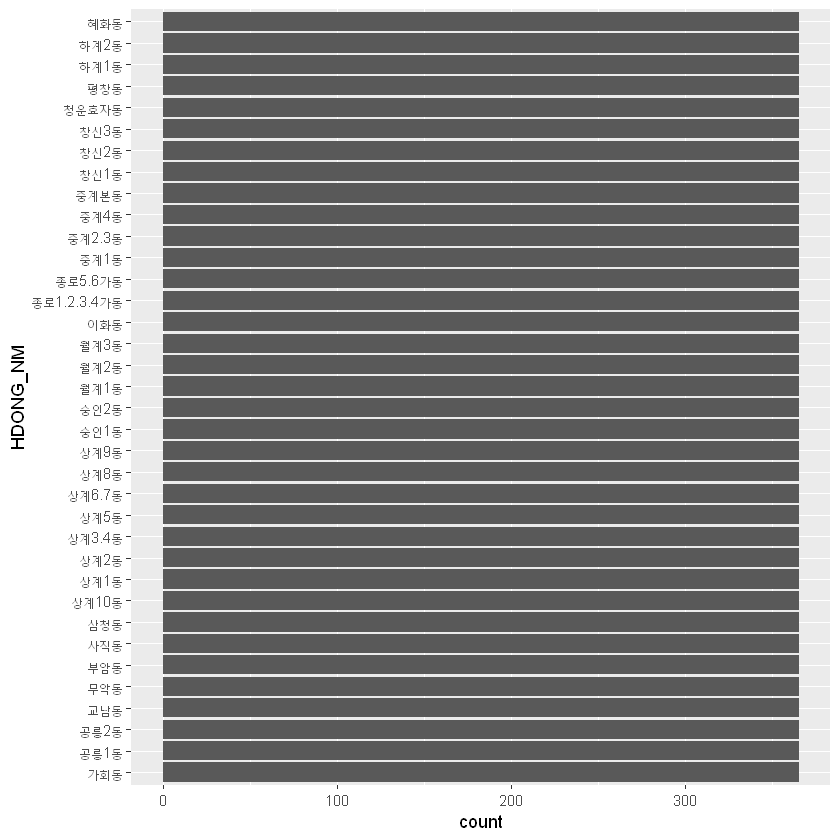

In [57]:
ggplot(all_year_dat, aes(HDONG_NM)) + geom_bar() + coord_flip() 

### 월별 통계- 30세까지의 통계

In [59]:
doc4

No.,컬럼ID,컬럼명,타입,길이
1,STD_YM,년월,VARCHAR2,6
2,STD_YMD,년월일,VARCHAR2,8
3,HDONG_CD,행정동코드,VARCHAR2,10
4,HDONG_NM,행정동명칭,VARCHAR2,50
5,MAN_FLOW_POP_CNT_0004,남성_0004세 유동인구,NUMBER,"(18, 2)"
6,MAN_FLOW_POP_CNT_0509,남성_0509세 유동인구,NUMBER,"(18, 2)"
7,MAN_FLOW_POP_CNT_1014,남성_1014세 유동인구,NUMBER,"(18, 2)"
8,MAN_FLOW_POP_CNT_1519,남성_1519세 유동인구,NUMBER,"(18, 2)"
9,MAN_FLOW_POP_CNT_2024,남성_2024세 유동인구,NUMBER,"(18, 2)"
10,MAN_FLOW_POP_CNT_2529,남성_2529세 유동인구,NUMBER,"(18, 2)"


In [67]:
sel <- c("MAN_FLOW_POP_CNT_0004", "MAN_FLOW_POP_CNT_0509", "MAN_FLOW_POP_CNT_1014", "MAN_FLOW_POP_CNT_1519")
mv_pop_0_20 <- all_year_dat %>% group_by(STD_YM) %>% summarize("4_"=sum(MAN_FLOW_POP_CNT_0004),
                                                "5_9"=sum(MAN_FLOW_POP_CNT_0509),
                                                "10_14"=sum(MMAN_FLOW_POP_CNT_1014),
                                                "15_19"=sum(MAN_FLOW_POP_CNT_1519))
mv_pop_0_20

STD_YM,4_,5_9,10_14,15_19
201804,248.94,248.94,248.94,1999485
201805,229.16,229.16,229.16,2277846
201806,302.73,302.73,302.73,1942572
201807,309.97,309.97,309.97,1860376
201808,418.38,418.38,418.38,1721401
201809,756.65,756.65,756.65,1917962
201810,1128.64,1128.64,1128.64,2079058
201811,1957.30,1957.30,1957.30,2113674
201812,944.45,944.45,944.45,1873017
201901,628.84,628.84,628.84,1407258


In [73]:
mv_pop_0_20$total <- mv_pop_0_20$`4_` + mv_pop_0_20$`5_9` + mv_pop_0_20$`10_14` + mv_pop_0_20$`15_19`
mv_pop_0_20
str(mv_pop_0_20)

STD_YM,4_,5_9,10_14,15_19,total
201804,248.94,248.94,248.94,1999485,2000232
201805,229.16,229.16,229.16,2277846,2278533
201806,302.73,302.73,302.73,1942572,1943480
201807,309.97,309.97,309.97,1860376,1861306
201808,418.38,418.38,418.38,1721401,1722656
201809,756.65,756.65,756.65,1917962,1920232
201810,1128.64,1128.64,1128.64,2079058,2082444
201811,1957.30,1957.30,1957.30,2113674,2119545
201812,944.45,944.45,944.45,1873017,1875850
201901,628.84,628.84,628.84,1407258,1409144


Classes 'tbl_df', 'tbl' and 'data.frame':	12 obs. of  6 variables:
 $ STD_YM: int  201804 201805 201806 201807 201808 201809 201810 201811 201812 201901 ...
 $ 4_    : num  249 229 303 310 418 ...
 $ 5_9   : num  249 229 303 310 418 ...
 $ 10_14 : num  249 229 303 310 418 ...
 $ 15_19 : num  1999485 2277846 1942572 1860376 1721401 ...
 $ total : num  2000232 2278533 1943480 1861306 1722656 ...


### 총 유동인구 : 2018년 5월과 2019년 3월에 가장 많았다.

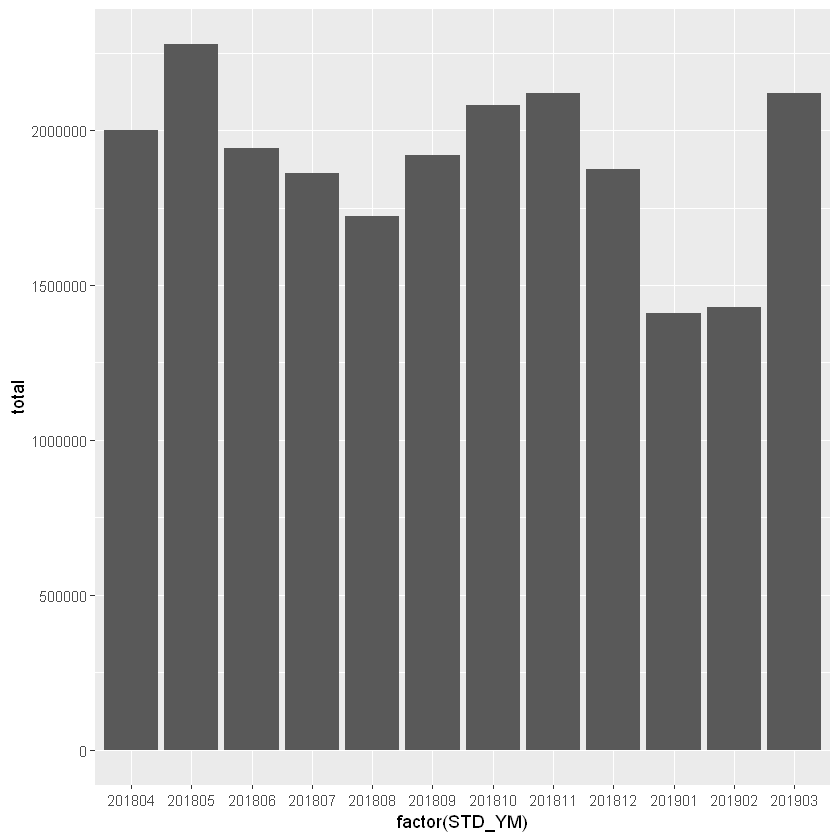

In [78]:
ggplot(mv_pop_0_20, aes(x=factor(STD_YM), y=total)) + geom_col()